In [1]:
#Important libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# **Basic Informations about data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# **Checking missing value**

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# **Statistical Description**

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# **Checking skewness and Kurtosis**

In [6]:
columns = df.select_dtypes(include=np.number)
skew = columns.skew()
skew

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

In [7]:
kurt = columns.kurt()
kurt

math score       0.274964
reading score   -0.068265
writing score   -0.033365
dtype: float64

# **Outlires**

In [8]:
for c in columns:
    Q1 = df[c].quantile(.25)
    Q2 = df[c].quantile(.5)
    Q3 = df[c].quantile(.75)

    # Inter Quartile Range
    IQR = Q3 - Q1

    LW = Q1 - 1.5*IQR #Lower wisker
    UW = Q3 + 1.5*IQR #Upper wisker

    outliers = ((df[c] < LW) | (df[c] > UW)).sum()
    print(f'{c} has {outliers} outliers.')

math score has 8 outliers.
reading score has 6 outliers.
writing score has 5 outliers.


In [9]:
by_ethnicity = df.groupby('race/ethnicity').mean(numeric_only=True)
by_ethnicity


,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


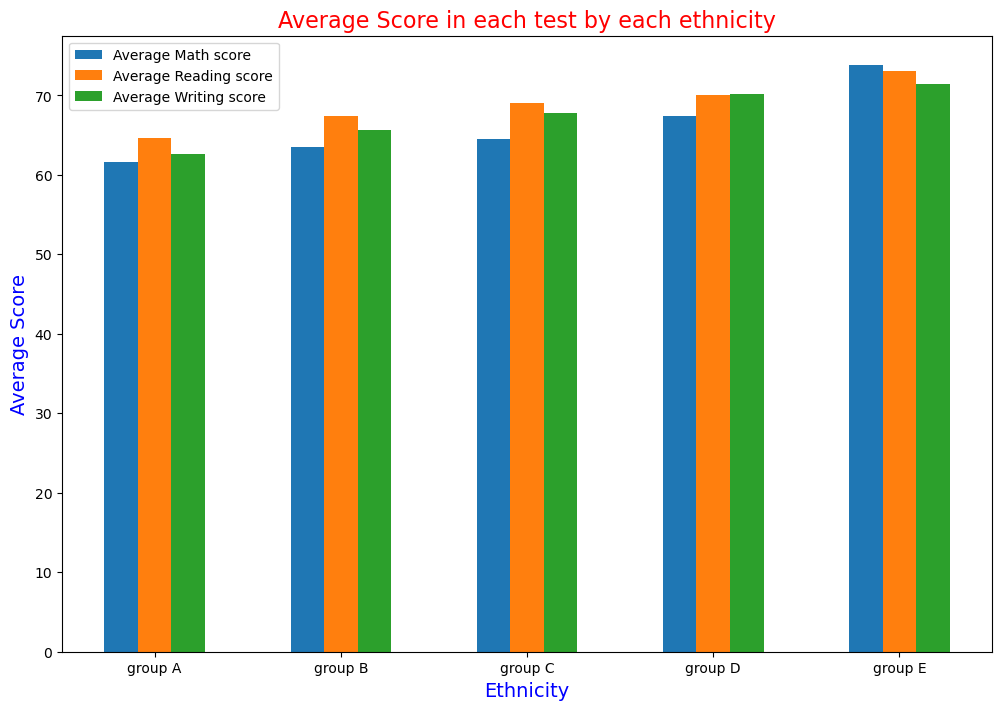

In [10]:
band = 0.18
x = np.arange(len(by_ethnicity.index))

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(x-band, by_ethnicity['math score'], width=band, label='Average Math score')
ax.bar(x, by_ethnicity['reading score'], width=band, label='Average Reading score')
ax.bar(x+band, by_ethnicity['writing score'], width=band, label='Average Writing score')

ax.set_xticks(x, by_ethnicity.index)
ax.set_title('Average Score in each test by each ethnicity', color='red', fontsize=16)
ax.set_xlabel('Ethnicity', color='blue', fontsize=14)
ax.set_ylabel('Average Score', color='blue', fontsize=14)
plt.legend()
plt.show()

In [11]:
by_parent_education = df.groupby('parental level of education').mean(numeric_only=True)
by_parent_education

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


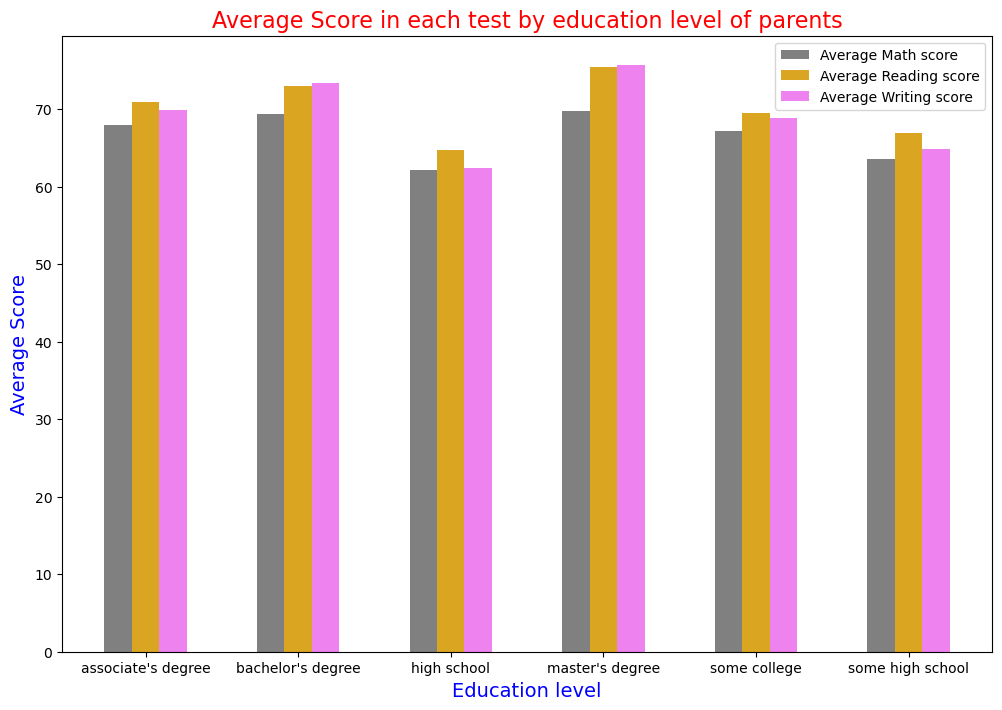

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))

band = 0.18
x = np.arange(len(by_parent_education.index))

ax.bar(x-band, by_parent_education['math score'], width=band, label='Average Math score', color='gray')
ax.bar(x, by_parent_education['reading score'], width=band, label='Average Reading score', color='goldenrod')
ax.bar(x+band, by_parent_education['writing score'], width=band, label='Average Writing score', color='violet')

ax.set_xticks(x, by_parent_education.index)
ax.set_title('Average Score in each test by education level of parents', color='red', fontsize=16)
ax.set_xlabel('Education level', color='blue', fontsize=14)
ax.set_ylabel('Average Score', color='blue', fontsize=14)
plt.legend()
plt.show()

    Children of panrents with higher education level get better marks than others cheldren.

In [13]:
by_education = df.groupby('parental level of education').agg(count=('gender', 'count'))

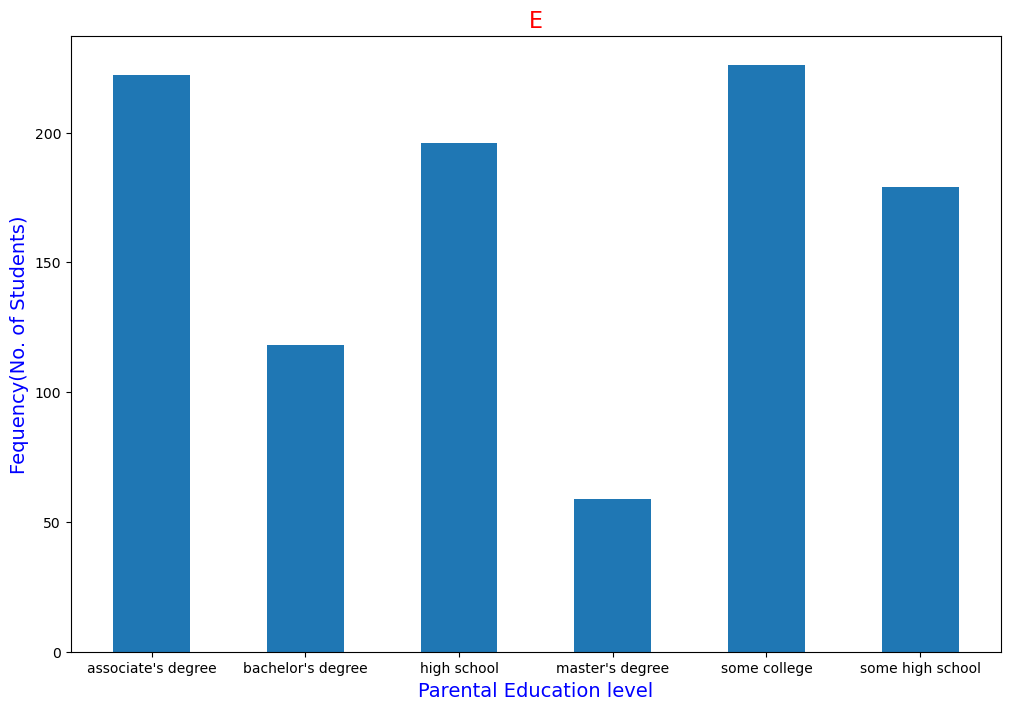

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(by_education.index, by_education['count'], width=0.5)

ax.set_title('E', color='red', fontsize=16)
ax.set_xlabel('Parental Education level', color='blue', fontsize=14)
ax.set_ylabel('Fequency(No. of Students)', color='blue', fontsize=14)

plt.show()

In [15]:
by_ethnicity = df.groupby('race/ethnicity').agg(count=('gender', 'count'))

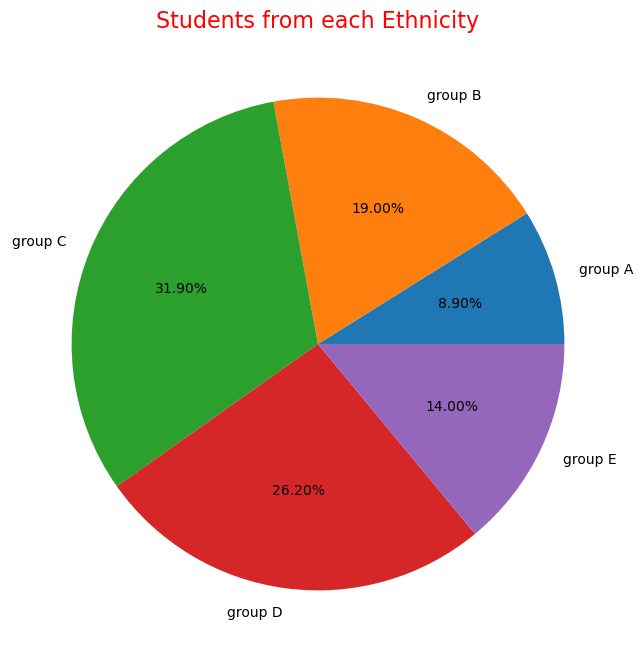

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.pie(by_ethnicity['count'], labels=by_ethnicity.index, autopct='%0.2f%%')
ax.set_title('Students from each Ethnicity', color='red', fontsize=16)
plt.show()

In [17]:
df['avg_score'] = np.round((df['math score']+df['reading score']+df['writing score']) / 3, 2)

grade = ['E', 'D', 'C', 'B', 'A', 'A+']
bins = [0, 35, 45, 60, 75, 90, 100]

df['grades'] = pd.cut(df['avg_score'], labels=grade, bins=bins)

In [18]:
by_grades = df.groupby('grades', observed=False).agg(count=('avg_score', 'count'))
by_grades

,count
grades,
E,18
D,38
C,237
B,394
A,263
A+,50


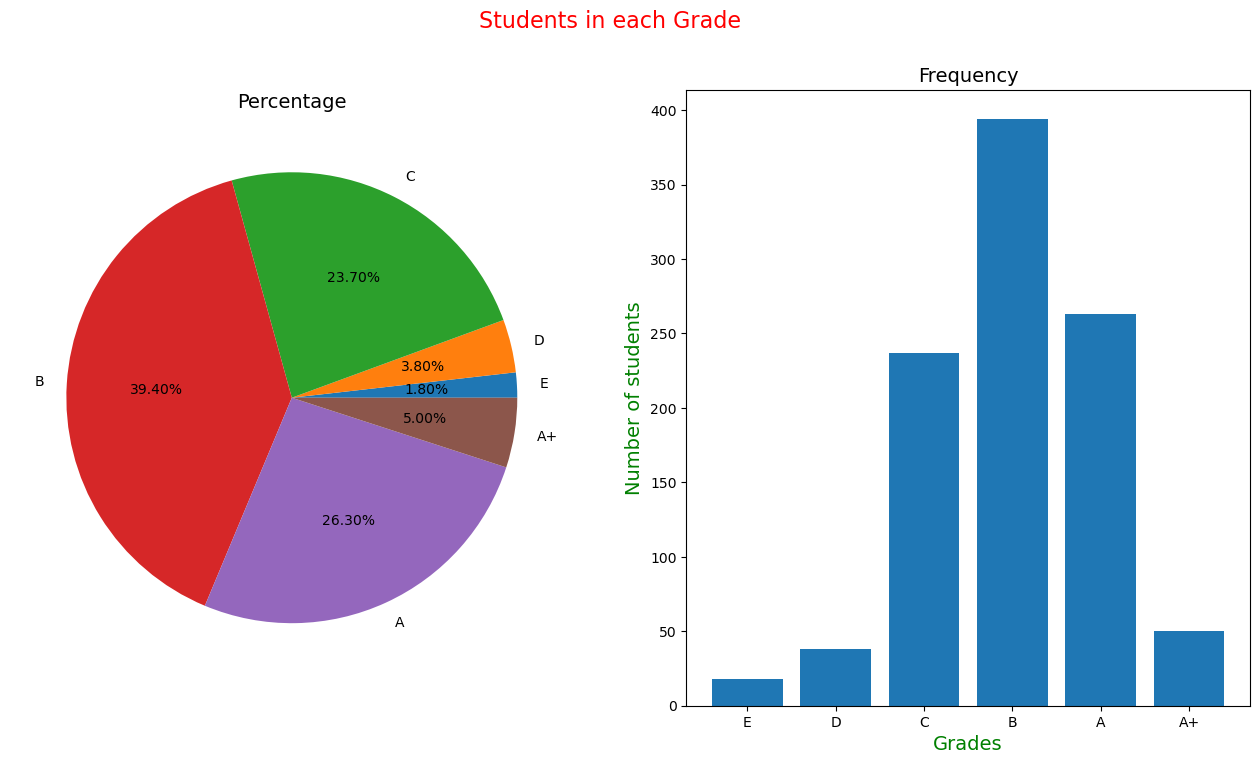

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (16, 8))

#Pie chart
ax[0].pie(by_grades['count'], labels=by_grades.index, autopct='%.2f%%')
ax[0].set_title('Percentage', fontsize=14)

# bar plot
ax[1].bar(by_grades.index, by_grades['count'] )
ax[1].set_xlabel('Grades', color='green', fontsize=14)
ax[1].set_ylabel('Number of students', color='green', fontsize=14)
ax[1].set_title('Frequency', fontsize=14)

fig.suptitle('Students in each Grade', color='red', fontsize=16)
plt.show()

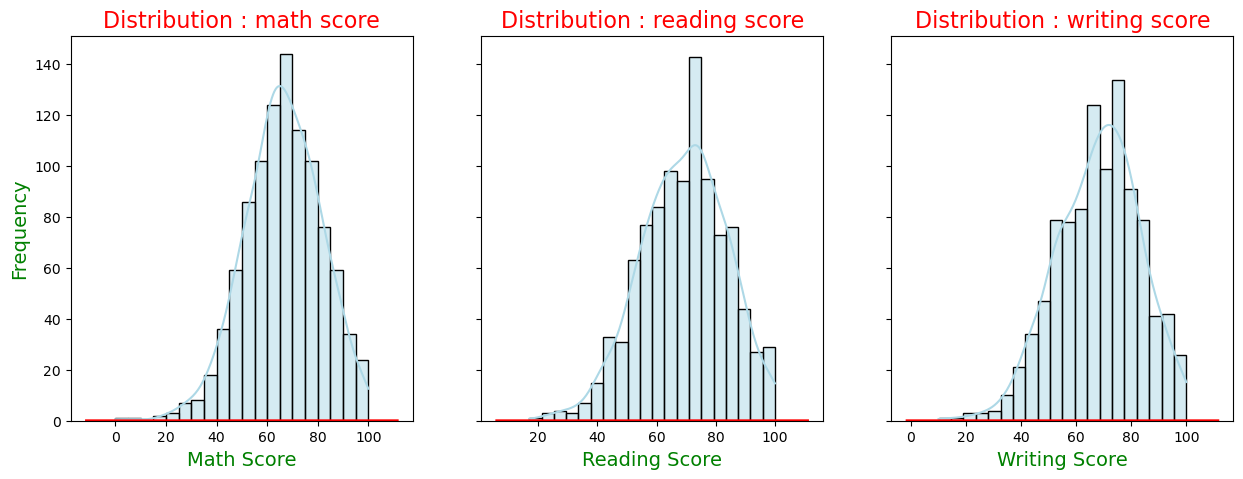

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
xlables = ['Math Score', 'Reading Score', 'Writing Score']
for i, score in enumerate(['math score', 'reading score', 'writing score']):
    #Histogram ploting
    sns.histplot(df[score], bins=20, ax=ax[i], kde=True, color='lightblue', edgecolor='black')
    sns.kdeplot(df[score], ax=ax[i], color='red', linewidth=2)

    
    ax[i].set_title(f'Distribution : {score}', color='red', fontsize=16)
    ax[i].set_xlabel(xlables[i], color='green', fontsize=14)
    ax[i].set_ylabel('Frequency', color='green', fontsize=14)



In [21]:
scores = df.select_dtypes(include=np.number)
corr = scores.corr()
corr

,math score,reading score,writing score,avg_score
math score,1.000000,0.817580,0.802642,0.918744
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965669
avg_score,0.918744,0.970331,0.965669,1.000000


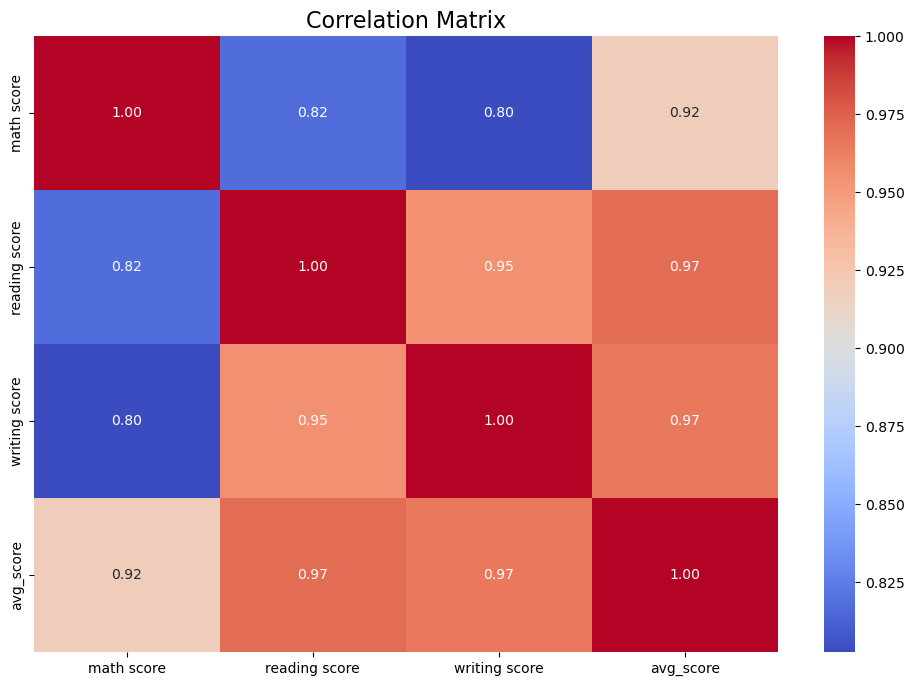

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm',annot=True, fmt='0.2f')

ax.set_title('Correlation Matrix', fontsize=16)
plt.show()